In [8]:
import pandas as pd
import numpy as np
import os

In [9]:
os.getcwd()

'/Users/go-eun/Documents/Teampl_small'

## 데이터 경로 다른 곳으로 변경

In [ ]:
os.chdir('')

## 데이터 불러오기

In [10]:
loan = pd.read_csv('loan.csv')

In [11]:
loan.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,url
0,1,5000.0,5000.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,11-Dec,Fully Paid,NaN
1,2,2500.0,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,11-Dec,Charged Off,NaN
2,3,2400.0,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,11-Dec,Fully Paid,NaN
3,4,10000.0,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,11-Dec,Fully Paid,NaN
4,5,3000.0,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,11-Dec,Fully Paid,NaN


In [12]:
group_dummy_mat = pd.get_dummies( loan['loan_amnt_group'])
group_dummy_mat

KeyError: 'loan_amnt_group'

In [14]:
loan = loan.drop(['url'],axis=1 )

In [15]:
loan.describe()

,loan_amnt,funded_amnt,installment,annual_inc
count,3749.000000,3749.000000,3749.000000,3.745000e+03
mean,10017.631368,9733.802347,312.055268,6.893535e+04
std,6781.205405,6460.579725,207.617467,6.123424e+04
min,500.000000,500.000000,15.670000,1.896000e+03
25%,5000.000000,5000.000000,159.180000,3.850000e+04
50%,8000.000000,8000.000000,264.610000,5.500400e+04
75%,14000.000000,13250.000000,416.750000,8.000000e+04
max,35000.000000,35000.000000,1243.850000,1.440000e+06


In [17]:
loan.describe(include='all')

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status
count,1002,3749.000000,3749.000000,3749,3749,3749.000000,3749,3749,3749,3.745000e+03,3749,3749
unique,1002,NaN,NaN,2,305,NaN,7,35,5,NaN,44,4
top,1,NaN,NaN,36 months,11.71%,NaN,C,C2,RENT,NaN,11-Dec,Does not meet the credit policy. Status:Fully ...
freq,1,NaN,NaN,3163,84,NaN,836,195,1860,NaN,1000,1988
mean,NaN,10017.631368,9733.802347,NaN,NaN,312.055268,NaN,NaN,NaN,6.893535e+04,NaN,NaN
std,NaN,6781.205405,6460.579725,NaN,NaN,207.617467,NaN,NaN,NaN,6.123424e+04,NaN,NaN
min,NaN,500.000000,500.000000,NaN,NaN,15.670000,NaN,NaN,NaN,1.896000e+03,NaN,NaN
25%,NaN,5000.000000,5000.000000,NaN,NaN,159.180000,NaN,NaN,NaN,3.850000e+04,NaN,NaN
50%,NaN,8000.000000,8000.000000,NaN,NaN,264.610000,NaN,NaN,NaN,5.500400e+04,NaN,NaN
75%,NaN,14000.000000,13250.000000,NaN,NaN,416.750000,NaN,NaN,NaN,8.000000e+04,NaN,NaN


In [18]:
## annual_inc ->monthly_inc
loan['monthly_inc'] = loan['annual_inc']/12

In [19]:
loan.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,monthly_inc
0,1,5000.0,5000.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,11-Dec,Fully Paid,2000.000000
1,2,2500.0,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,11-Dec,Charged Off,2500.000000
2,3,2400.0,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,11-Dec,Fully Paid,1021.000000
3,4,10000.0,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,11-Dec,Fully Paid,4100.000000
4,5,3000.0,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,11-Dec,Fully Paid,6666.666667


In [21]:
loan['high_inc']=loan['annual_inc'] > 500000
loan.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,monthly_inc,high_inc
0,1,5000.0,5000.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,11-Dec,Fully Paid,2000.000000,False
1,2,2500.0,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,11-Dec,Charged Off,2500.000000,False
2,3,2400.0,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,11-Dec,Fully Paid,1021.000000,False
3,4,10000.0,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,11-Dec,Fully Paid,4100.000000,False
4,5,3000.0,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,11-Dec,Fully Paid,6666.666667,False


In [25]:
#### 행렬의 transpose
loan.T

,0,1,2,3,4,5,6,7,8,9,...,42532,42533,42534,42535,42536,42537,42538,42539,42540,42541
id,1,2,3,4,5,6,7,8,9,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total amount funded in policy code 1: 460296150,Total amount funded in policy code 2: 0
loan_amnt,5000.0,2500.0,2400.0,10000.0,3000.0,5000.0,7000.0,3000.0,5600.0,5375.0,...,6500.0,3500.0,1000.0,2525.0,6500.0,5000.0,NaN,NaN,NaN,NaN
funded_amnt,5000.0,2500.0,2400.0,10000.0,3000.0,5000.0,7000.0,3000.0,5600.0,5375.0,...,6500.0,3500.0,1000.0,2525.0,6500.0,5000.0,NaN,NaN,NaN,NaN
term,36 months,60 months,36 months,36 months,60 months,36 months,60 months,36 months,60 months,60 months,...,36 months,36 months,36 months,36 months,36 months,36 months,NaN,NaN,NaN,NaN
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%,7.90%,15.96%,18.64%,21.28%,12.69%,...,9.64%,10.28%,9.64%,9.33%,8.38%,7.75%,NaN,NaN,NaN,NaN
installment,162.87,59.83,84.33,339.31,67.79,156.46,170.08,109.43,152.39,121.45,...,208.66,113.39,32.11,80.69,204.84,156.11,NaN,NaN,NaN,NaN
grade,B,C,C,C,B,A,C,E,F,B,...,B,C,B,B,A,A,NaN,NaN,NaN,NaN
sub_grade,B2,C4,C5,C1,B5,A4,C5,E1,F2,B5,...,B4,C1,B4,B3,A5,A3,NaN,NaN,NaN,NaN
home_ownership,RENT,RENT,RENT,RENT,RENT,RENT,RENT,RENT,OWN,RENT,...,RENT,RENT,RENT,RENT,NONE,MORTGAGE,NaN,NaN,NaN,NaN
annual_inc,24000.0,30000.0,12252.0,49200.0,80000.0,36000.0,47004.0,48000.0,40000.0,15000.0,...,20000.0,180000.0,12000.0,110000.0,NaN,70000.0,NaN,NaN,NaN,NaN


# 그림 그리기

<Axes: >

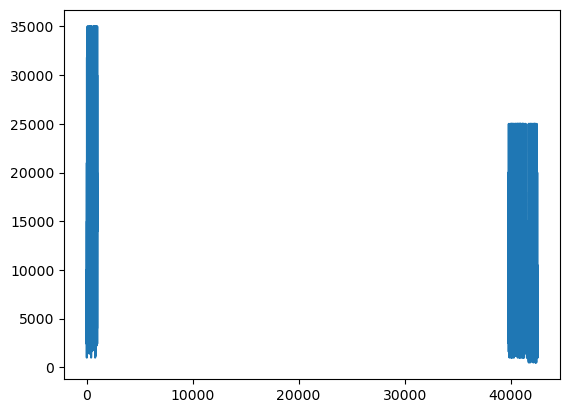

In [28]:
loan.loan_amnt.plot()

AttributeError: Line2D.set() got an unexpected keyword argument 'kinds'

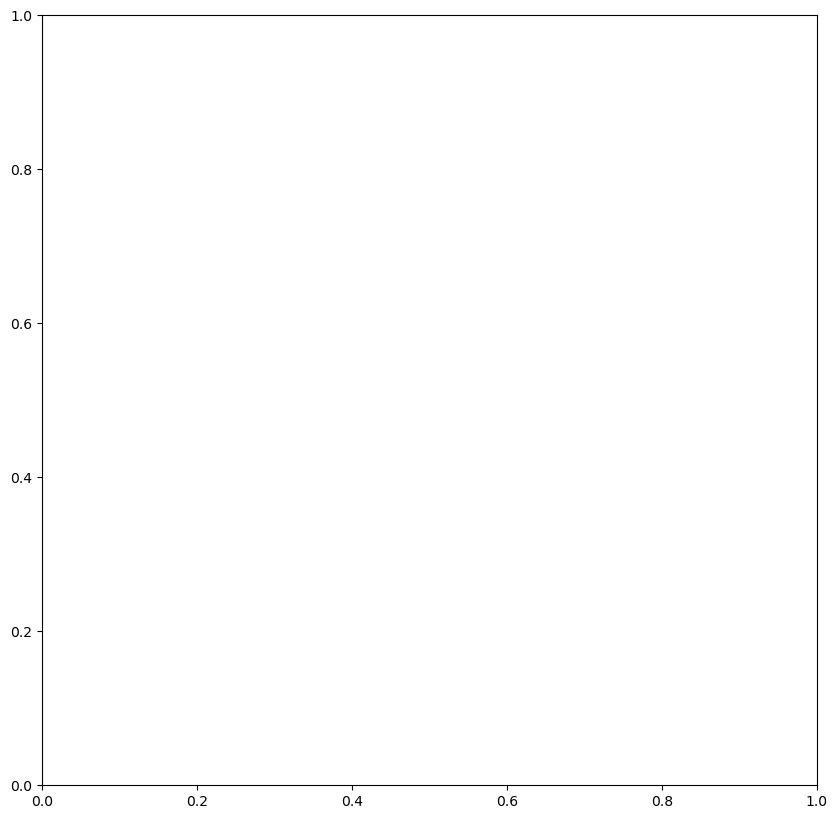

In [29]:
loan.loan_amnt.plot(kinds='hist',figsize=(10,10), bins=50)

In [33]:
#### 대출 금액이 $12,000 이상, 대출등급이 A등급
sub = loan[(loan.grade)=='A' & (loan.amnt)>=12000]
sub.loan_amnt.plot (kinds='hist' , figzie=(10,10), bins=50, range=(0,40000))

AttributeError: 'DataFrame' object has no attribute 'amnt'

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

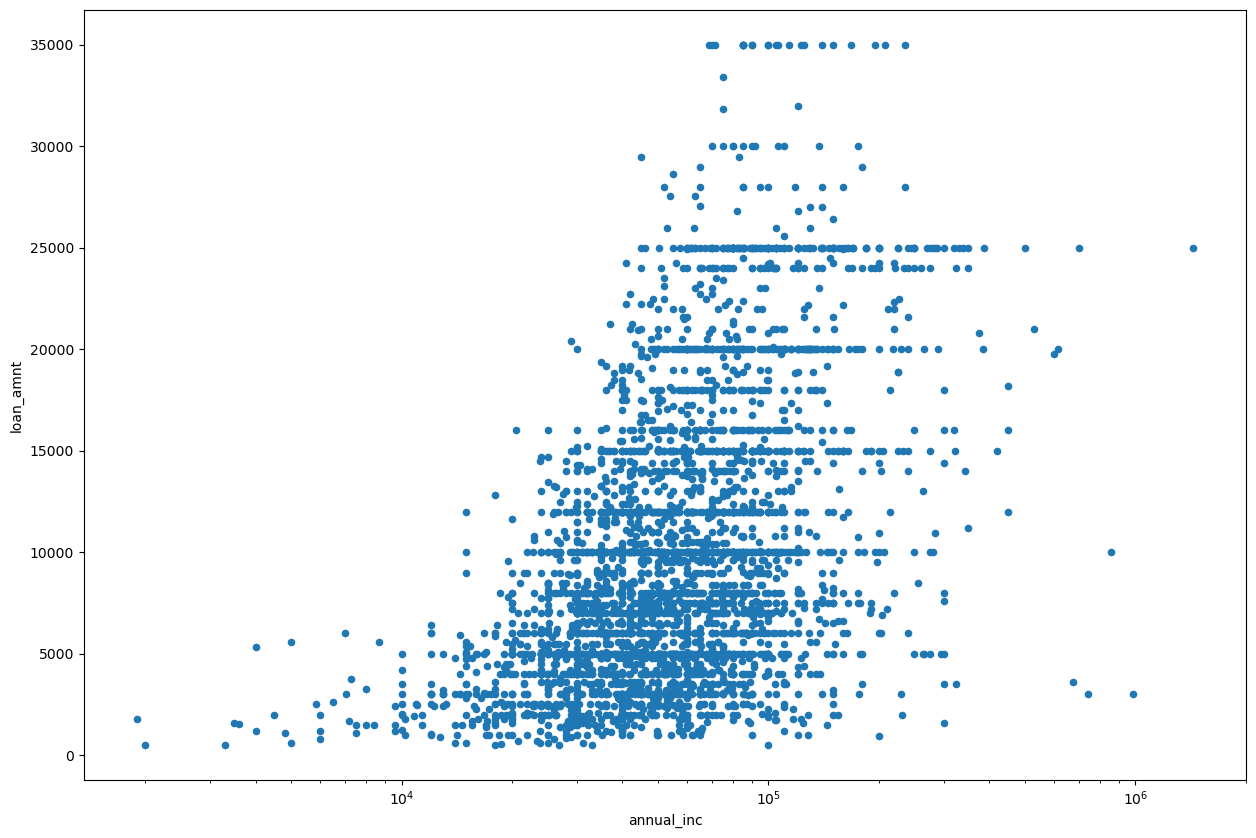

In [31]:
loan.plot(kind='scatter', x='annual_inc',y='loan_amnt', logx=True, figsize = (15,10))

<Axes: ylabel='home_ownership'>

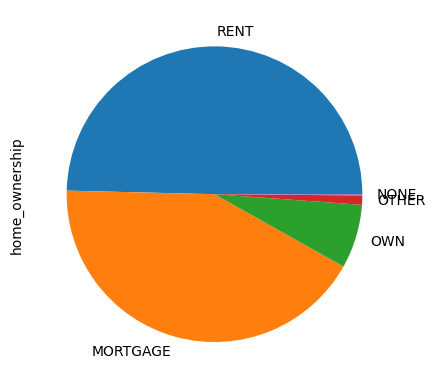

In [32]:
loan.home_ownership.value_counts().plot(kind='pie')

In [36]:
pd.crosstab(loan.grade, loan.home_ownership)

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
grade,,,,,
A,139,4,1,19,137
B,291,0,4,45,368
C,358,0,8,63,407
D,335,0,9,62,424
E,248,0,7,48,305
F,114,1,2,12,139
G,99,0,7,13,80


In [35]:
pd.crosstab(loan.grade, loan.home_ownership, normalize=True)

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
grade,,,,,
A,0.037077,0.001067,0.000267,0.005068,0.036543
B,0.077621,0.000000,0.001067,0.012003,0.098160
C,0.095492,0.000000,0.002134,0.016804,0.108562
D,0.089357,0.000000,0.002401,0.016538,0.113097
E,0.066151,0.000000,0.001867,0.012803,0.081355
F,0.030408,0.000267,0.000533,0.003201,0.037077
G,0.026407,0.000000,0.001867,0.003468,0.021339


In [37]:
pd.crosstab(loan.grade, loan.home_ownership,normalize=True, margins=True)

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT,All
grade,,,,,,
A,0.037077,0.001067,0.000267,0.005068,0.036543,0.080021
B,0.077621,0.000000,0.001067,0.012003,0.098160,0.188850
C,0.095492,0.000000,0.002134,0.016804,0.108562,0.222993
D,0.089357,0.000000,0.002401,0.016538,0.113097,0.221392
E,0.066151,0.000000,0.001867,0.012803,0.081355,0.162177
F,0.030408,0.000267,0.000533,0.003201,0.037077,0.071486
G,0.026407,0.000000,0.001867,0.003468,0.021339,0.053081
All,0.422513,0.001334,0.010136,0.069885,0.496132,1.000000


In [39]:
pd.crosstab([loan.grade, loan.sub_grade], loan.term)

term              36 months   60 months
grade sub_grade                        
A     A1                 30           0
      A2                 40           0
      A3                 45           0
      A4                 75           4
      A5                102           4
B     B1                118           5
      B2                107           6
      B3                138          19
      B4                135          15
      B5                135          30
C     C1                157          24
      C2                172          23
      C3                141          22
      C4                151          15
      C5                117          14
D     D1                148           2
      D2                138          39
      D3                142          37
      D4                139          34
      D5                123          28
E     E1                 94          31
      E2                110          43
      E3                 91          36
      E4                 80          28
      E5                 68          27
F     F1                 51          20
      F2                 50          14
      F3                 41          11
      F4                 31          12
      F5                 30           8
G     G1                 27          10
      G2                 22           8
      G3                 25           6
      G4                 39           6
      G5                 51           5

In [40]:
pd.crosstab([loan.grade, loan.term], loan.home_ownership)
##### 대부분 36개월 대출을 받고 있음 
###   아마도 60개월 대출은 이자가 비싼가 보다 라는 insight

home_ownership    MORTGAGE  NONE  OTHER  OWN  RENT
grade term                                        
A      36 months       135     4      1   18   134
       60 months         4     0      0    1     3
B      36 months       253     0      4   39   337
       60 months        38     0      0    6    31
C      36 months       310     0      8   55   365
       60 months        48     0      0    8    42
D      36 months       269     0      9   53   359
       60 months        66     0      0    9    65
E      36 months       166     0      7   31   239
       60 months        82     0      0   17    66
F      36 months        77     1      2    8   115
       60 months        37     0      0    4    24
G      36 months        81     0      7   12    64
       60 months        18     0      0    1    16

In [41]:
d = np.linspace( 0,15000, 6)

In [42]:
d

array([    0.,  3000.,  6000.,  9000., 12000., 15000.])

In [43]:
loan['loan_amnt_group'] = np.digitize(loan['loan_amnt'] , d)

In [44]:
loan.head(10)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,monthly_inc,high_inc,loan_amnt_group
0,1,5000.0,5000.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,11-Dec,Fully Paid,2000.000000,False,2
1,2,2500.0,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,11-Dec,Charged Off,2500.000000,False,1
2,3,2400.0,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,11-Dec,Fully Paid,1021.000000,False,1
3,4,10000.0,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,11-Dec,Fully Paid,4100.000000,False,4
4,5,3000.0,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,11-Dec,Fully Paid,6666.666667,False,2
5,6,5000.0,5000.0,36 months,7.90%,156.46,A,A4,RENT,36000.0,11-Dec,Fully Paid,3000.000000,False,2
6,7,7000.0,7000.0,60 months,15.96%,170.08,C,C5,RENT,47004.0,11-Dec,Fully Paid,3917.000000,False,3
7,8,3000.0,3000.0,36 months,18.64%,109.43,E,E1,RENT,48000.0,11-Dec,Fully Paid,4000.000000,False,2
8,9,5600.0,5600.0,60 months,21.28%,152.39,F,F2,OWN,40000.0,11-Dec,Charged Off,3333.333333,False,2
9,10,5375.0,5375.0,60 months,12.69%,121.45,B,B5,RENT,15000.0,11-Dec,Charged Off,1250.000000,False,2


In [46]:
pd.crosstab(loan.loan_amnt_group, loan.grade)

grade,A,B,C,D,E,F,G
loan_amnt_group,,,,,,,
1,30,60,72,111,61,13,17
2,72,150,197,206,152,41,38
3,65,131,171,166,137,53,26
4,52,119,126,96,77,39,19
5,36,104,87,69,46,25,26
6,45,144,183,182,135,97,73


In [49]:
loan.groupby('loan_amnt_group').describe()

loan_amnt                                                \
                    count          mean          std      min       25%   
loan_amnt_group                                                           
1                   364.0   1891.414835   587.756852    500.0   1500.00   
2                   856.0   4327.657710   836.623909   3000.0   3575.00   
3                   749.0   7184.145527   841.370439   6000.0   6400.00   
4                   528.0  10055.350379   622.880482   9000.0   9993.75   
5                   393.0  12845.737913   944.298122  12000.0  12000.00   
6                   859.0  20284.778813  4716.249140  15000.0  16000.00   

                                           funded_amnt                ...  \
                     50%      75%      max       count          mean  ...   
loan_amnt_group                                                       ...   
1                 2000.0   2400.0   2950.0       364.0   1873.008242  ...   
2                 4500.0   5000.0   5925.0       856.0   4306.191589  ...   
3                 7200.0   8000.0   8975.0       749.0   7081.508678  ...   
4                10000.0  10000.0  11875.0       528.0   9924.431818  ...   
5                12375.0  13925.0  14725.0       393.0  12643.575064  ...   
6                20000.0  24000.0  35000.0       859.0  19337.689173  ...   

                annual_inc            monthly_inc                            \
                       75%        max       count         mean          std   
loan_amnt_group                                                               
1                  52850.0   300000.0       364.0  3510.431200  2803.778495   
2                  65000.0   984000.0       855.0  4604.525061  4800.924305   
3                  75000.0   300000.0       746.0  5046.727665  3051.966996   
4                  77000.0   860000.0       528.0  5549.451526  4284.148220   
5                  80000.0   450000.0       393.0  5639.702290  3489.410261   
6                 117200.0  1440000.0       859.0  8600.159603  7099.675271   

                                                                     \
                         min          25%          50%          75%   
loan_amnt_group                                                       
1                 158.000000  1833.333333  2737.500000  4404.166667   
2                 333.333333  2500.000000  3750.000000  5416.666667   
3                 583.333333  3000.000000  4166.666667  6250.000000   
4                1250.000000  3521.000000  4616.500000  6416.666667   
5                1250.000000  3500.000000  5000.000000  6666.666667   
6                1711.083333  5000.000000  6666.666667  9766.666667   

                                
                           max  
loan_amnt_group                 
1                 25000.000000  
2                 82000.000000  
3                 25000.000000  
4                 71666.666667  
5                 37500.000000  
6                120000.000000  

[6 rows x 40 columns]

In [47]:
loan.groupby(['term', 'grade']).mean()['annual_inc']

/var/folders/lw/_1zgh_v16d3_9pp21p_rm1t40000gn/T/ipykernel_966/1794921343.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan.groupby(['term', 'grade']).mean()['annual_inc']


term        grade
 36 months  A        64972.615521
            B        70007.524850
            C        68319.035583
            D        65977.380507
            E        62721.940858
            F        75849.005025
            G        91419.947561
 60 months  A        54516.500000
            B        64385.106667
            C        69120.412245
            D        62383.651571
            E        73378.564121
            F        79301.146154
            G        85188.057143
Name: annual_inc, dtype: float64

In [48]:
loan.corr()

/var/folders/lw/_1zgh_v16d3_9pp21p_rm1t40000gn/T/ipykernel_966/2299969654.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan.corr()


,loan_amnt,funded_amnt,installment,annual_inc,monthly_inc,high_inc,loan_amnt_group
loan_amnt,1.000000,0.976726,0.935016,0.341247,0.341247,0.032309,0.918524
funded_amnt,0.976726,1.000000,0.971184,0.339147,0.339147,0.036068,0.915714
installment,0.935016,0.971184,1.000000,0.357698,0.357698,0.044677,0.888635
annual_inc,0.341247,0.339147,0.357698,1.000000,1.000000,0.581515,0.302360
monthly_inc,0.341247,0.339147,0.357698,1.000000,1.000000,0.581515,0.302360
high_inc,0.032309,0.036068,0.044677,0.581515,0.581515,1.000000,-0.023242
loan_amnt_group,0.918524,0.915714,0.888635,0.302360,0.302360,-0.023242,1.000000
